In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### importing abuse report data

In [323]:
data = pd.read_csv("merge_result.csv")
data.head(20)

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544164/,lrz_security,17488
3,3,544162,9/17/2020 10:10,http://115.98.145.51:60363/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544162/,lrz_security,17488
4,4,544161,9/17/2020 10:10,http://115.97.80.186:42284/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544161/,lrz_security,17488
5,5,544160,9/17/2020 10:10,http://115.98.102.230:45653/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544160/,lrz_security,17488
6,6,544159,9/17/2020 10:09,http://115.97.196.195:48233/Mozi.a,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544159/,lrz_security,17488
7,7,544158,9/17/2020 10:09,http://115.97.31.62:41424/Mozi.a,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544158/,lrz_security,17488
8,8,544157,9/17/2020 10:09,http://achar24.com/wp-admin/lm/,online,malware_download,"emotet,heodo",https://urlhaus.abuse.ch/url/544157/,spamhaus,24940
9,9,544155,9/17/2020 10:09,http://115.97.64.174:45095/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544155/,lrz_security,17488


### exploding the data, per malware tag

In [324]:
exploded_data=data.assign(tags=data.tags.str.split(",")).explode('tags')
exploded_data.head()

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488


In [325]:
#the length of exploded data
len(exploded_data)

265196

In [326]:
#the occurrence of tags
exploded_data['tags'].value_counts()

elf        89369
Mozi       53709
32-bit     35483
mips       34233
exe         6727
           ...  
 excel         1
Phobos         1
 32-bit        1
rar            1
sLoad          1
Name: tags, Length: 197, dtype: int64

### importing the reactspeed per country data

In [327]:
reactspeed = pd.read_csv("reactspeedURLhaus_inminutes.csv")
reactspeed.head()
len(reactspeed)

4813

## Reactspeed metrics
### Average reaction time per country

In [328]:
countries_and_sum_reactiontime = {}
for index, row in reactspeed.iterrows():
    country_code = row['Country']
    if type(country_code) != str or len(country_code) != 2:
        # Remove entries for which we don't know the country
        continue
    minutes_to_add = row['total_in_minutes']
    if country_code in countries_and_sum_reactiontime:
        minutes_so_far, counts_so_far = countries_and_sum_reactiontime[country_code]
        countries_and_sum_reactiontime[country_code] = (minutes_so_far + minutes_to_add), (counts_so_far + 1)
    else:
        countries_and_sum_reactiontime[country_code] = minutes_to_add, 1

sum_reaction_time = 0
for country in countries_and_sum_reactiontime.keys():
    minutes, counts = countries_and_sum_reactiontime[country]
    reaction_time_per_country = int(minutes / counts)
    countries_and_sum_reactiontime[country] = reaction_time_per_country
    sum_reaction_time = sum_reaction_time + reaction_time_per_country
#plt.bar(*zip(*countries_and_sum_reactiontime.items()))
#plt.show()
countries_data = pd.DataFrame.from_dict(countries_and_sum_reactiontime, orient='index', columns=['reaction_time'])
countries_data

,reaction_time
BR,37629
AT,26164
US,48719
ID,47830
TW,85361
...,...
SY,227582
SR,277020
GY,403208
NI,492440


In [329]:
### Median reaction time per country

In [330]:
median = int(sum_reaction_time / len(countries_and_sum_reactiontime))
median

median_per_country = reactspeed.groupby('Country')['total_in_minutes'].median()




median_per_country = median_per_country.to_frame()
median_per_country.columns = ['median']

median_per_country_sort = median_per_country.sort_values(by ='median', ascending=False)
median_per_country

,median
Country,
AE,16110.5
AL,5819.0
AM,108223.0
AR,5960.0
AT,5403.0
...,...
VU,36.0
XK,24367.0
YE,587.0


### plot the median and average time for per country

countries are the top 20 in the "average reaction time" dataframe

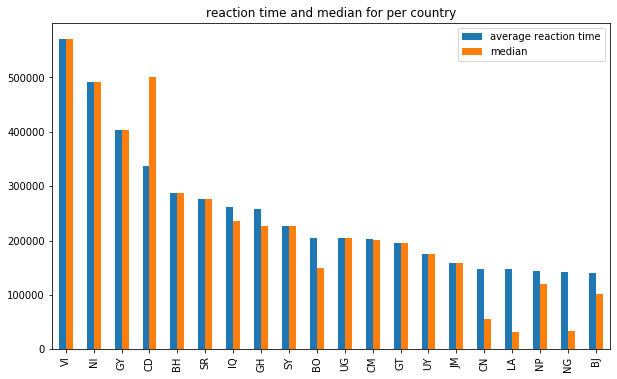

In [331]:

#average time 
plot_data_reaction_time = countries_data
plot_data_reaction_time = plot_data_reaction_time.sort_values(by = ['reaction_time'], ascending=False)
plot_data_reaction_time = plot_data_reaction_time[:20]
#print(plot_data_reaction_time.index.values)
#plt.bar(plot_data_reaction_time.index.values, plot_data_reaction_time['reaction_time'])
plot_data_reaction_time

#median of per country
country_list_top20 = plot_data_reaction_time.index.values
median_top20 = []
for name in country_list_top20:
    value = median_per_country.loc[name,'median']
    median_top20.append(value)
name = ['median']

median_top20 = pd.DataFrame(columns=name,data=median_top20)
median_top20.index = plot_data_reaction_time.index
df = pd.concat([plot_data_reaction_time,median_top20],axis=1)


ax = df.plot(figsize = (10,6),kind = 'bar')
plt.title('reaction time and median for per country')
ax.legend(["average reaction time", "median"])

plt.show()

       
       
       
    

countries are the top 20 in the "median" dataframe

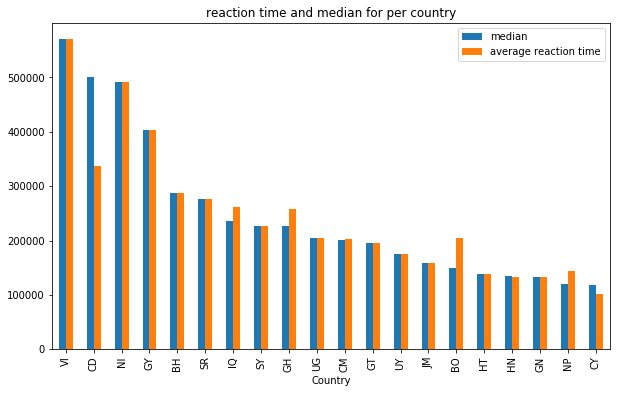

In [332]:


#average time 
plot_median = median_per_country_sort[:20]
plot_median

#median of per country
country_list_top20 = plot_median.index.values
average_top20 = []
for name in country_list_top20:
    value = countries_data.loc[name,'reaction_time']
    average_top20.append(value)

name = ['average_time']

average_top20 = pd.DataFrame(columns=name,data = average_top20)
average_top20.index = plot_median.index
df = pd.concat([plot_median,average_top20],axis=1)


ax = df.plot(figsize = (10,6),kind = 'bar')
plt.title('reaction time and median for per country')
ax.legend(["median","average reaction time" ])
plt.show()

### Number of malware URLs per country

In [333]:
countries_and_sum_urls = {}
total_count = 0
for index, row in reactspeed.iterrows():
    country_code = row['Country']
    if type(country_code) != str or len(country_code) != 2:
        # Remove entries for which we don't know the country
        continue
    online_count = row['Online']
    offline_count = row['Offline']
    combined_count = online_count + offline_count
    total_count = total_count + combined_count
    if country_code in countries_and_sum_urls:
        count_so_far = countries_and_sum_urls[country_code]
        countries_and_sum_urls[country_code] = count_so_far + combined_count
    else:
        countries_and_sum_urls[country_code] = combined_count
#plt.bar(*zip(*countries_and_sum_urls.items()))
#plt.show()
countries_data.loc[:, 'count_urls'] = countries_and_sum_urls.values()
countries_data.head(20)
# if negative then no correlation between the two attributes:
countries_data.corr()

,reaction_time,count_urls
reaction_time,1.000000,-0.042044
count_urls,-0.042044,1.000000


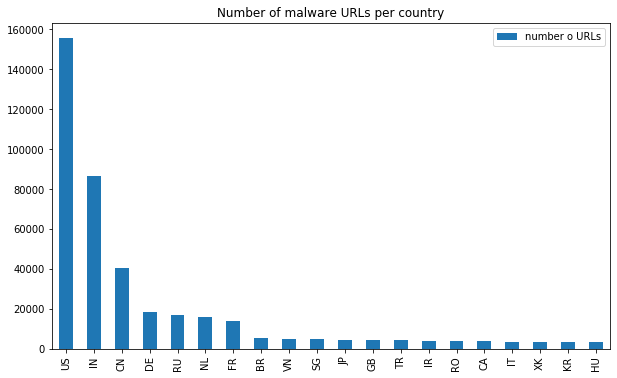

In [334]:
#number of malware URLs per country

plot_countries_URLs = countries_data
plot_countries_URLs = plot_countries_URLs.sort_values(by = ['count_urls'],ascending=False)
plot_countries_URLs = plot_countries_URLs[:20]

ax = plot_countries_URLs['count_urls'].plot(figsize = (10,6),kind = 'bar')
plt.title('Number of malware URLs per country')
ax.legend(["number o URLs" ])
plt.show()


### Average number of malware URLs per country

In [335]:
print(total_count / len(countries_and_sum_urls))

2819.4649681528663


### Reactiontime per ASN

In [336]:
asns_and_reaction_time = {}
total_count = 0
for index, row in reactspeed.iterrows():
    as_number = row['AS_Number']
    reaction_time = row['total_in_minutes']
    total_count = total_count + reaction_time
    if as_number in asns_and_reaction_time:
        counts_so_far = asns_and_reaction_time[as_number]
        asns_and_reaction_time[as_number] = counts_so_far + reaction_time
    else:
        asns_and_reaction_time[as_number] = reaction_time

asns_data = pd.DataFrame.from_dict(asns_and_reaction_time, orient='index', columns=['reaction_time'])
asns_data.head()

,reaction_time
52715,3
13022,5
22438,7
137344,7
17716,8


### Number of malware URLs per ASN

In [357]:
asns_and_sum_malware = {}
total_count = 0
for index, row in reactspeed.iterrows():
    as_number = row['AS_Number']
    online_count = row['Online']
    offline_count = row['Offline']
    combined_count = online_count + offline_count
    total_count = total_count + combined_count
    if as_number in asns_and_sum_malware:
        counts_so_far = asns_and_sum_malware[as_number]
        asns_and_sum_malware[as_number] = counts_so_far + combined_count
    else:
        asns_and_sum_malware[as_number] = combined_count

asns_data.loc[:, 'count_urls'] = asns_and_sum_malware.values()
asns_data.head()
# if negative then no correlation between the two attributes:
asns_data.corr()
#plt.bar(*zip(*asns_and_sum_malware.items()))
#plt.show()
type(asns_and_sum_malware)
asns_data.head()
total_count


444157

### Average number of malware URLs per ASN

In [360]:
print(total_count /len(reactspeed))

92.28277581549969


### merging the abuse report with the reactspeed data, to get the country of each report ! NOT accurate, comparing last 30 days URLs with all-time ASN stats

In [361]:
data_withcountry=pd.merge(data,reactspeed,on="AS_Number",how="left")
data_withcountry.head()

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number,rank,Name,Country,Online,Offline,months,days,hours,minutes,total_in_minutes
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544163/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544164/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
3,3,544162,9/17/2020 10:10,http://115.98.145.51:60363/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544162/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0
4,4,544161,9/17/2020 10:10,http://115.97.80.186:42284/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544161/,lrz_security,17488,419.0,HATHWAY-NET-AP Hathway IP Over Cable ...,IN,1172.0,73269.0,0.0,0.0,4.0,44.0,284.0


checking the occurrence of attack per country (not normalized yet!!!)

In [16]:
data_withcountry['Country'].value_counts()

IN    65268
CN     8117
DE     4909
US     3072
BR      642
      ...  
GH        1
LV        1
BA        1
SD        1
UY        1
Name: Country, Length: 95, dtype: int64

### plot the number of malware URLs per ASN(top 20)

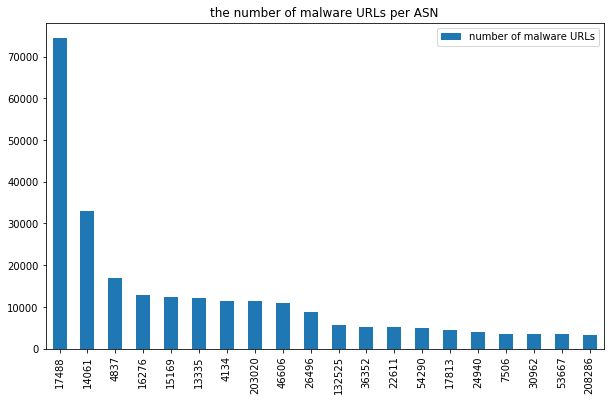

In [351]:
plot_average_url_perasn = asns_data
plot_average_url_perasn = plot_average_url_perasn.sort_values(by = ['count_urls'], ascending=False)

plot_average_url_perasn = plot_average_url_perasn[:20]
plot_average_url_perasn

ax = plot_average_url_perasn['count_urls'].plot(figsize = (10,6),kind = 'bar')
plt.title('the number of malware URLs per ASN')
ax.legend(["number of malware URLs" ])
plt.show()



### TO DO: Identify malware campaigns in the last 30 days

In [74]:
# Attempt at clustering
# Need to try the best number of clusters, maybne KMeans not the best approach

#data_for_clustering = countries_data
##df_norm = (data_for_clustering - data_for_clustering.mean()) / (data_for_clustering.max() - data_for_clustering.min())
#df_norm = data_for_clustering
#kmeans = KMeans(n_clusters=5).fit(df_norm)
#centroids = kmeans.cluster_centers_
#print(centroids)

#plt.scatter(df_norm['reaction_time'], df_norm['count_urls'], c= kmeans.labels_.astype(float), alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
#plt.show()

Estimated number of clusters: 1
Estimated number of noise points: 21
Homogeneity: 0.078
Completeness: 1.000
V-measure: 0.144
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.690


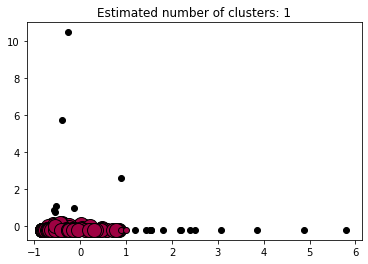

In [87]:
# #############################################################################
# Generate sample data
X = countries_data
labels_true = X.index

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()